# gunzip -c SRR27959541.fastq.gz | NanoFilt -q 10 -l 200 --minGC 0.3 | gzip > filtered_reads.fastq.gzA

In [1]:
with open('SRR27959541.fastq', 'r') as file:
    # Read the file line by line
    reads = []
    lengths = []
    for i,line in enumerate(file):
        # Process each line as needed
        if 'length' in line:
            lengths.append((line.strip().split('=')[-1]))
        reads.append(line.strip())

In [2]:
reads

['@SRR27959541.1.1 7fc6c3ce-b127-4a32-accc-be2363af43a9 length=401',
 'ATCCTGTACTTCGTTCAGTTACGTATTGCTAAGGTTAACCTGGTAACTGGGACACAAGACTCCAGCACCTTCTCATACGACGGGTGGCCGCTTCAATGTCATCTTCTTCTTTCACTTTGCTGGTTTTCAGCAGAATTGCAGAAACCACGAAGGAGACCGCCATTGCCGCCACGATGGCAGCGATGTTAGCGAAGTAAGCGCCTTTTGGCGTCATCGCCAGTACGGCCAGAATCGAGCCAGGAGAAGCCGGAGAAACCAGACCGCCGTTCAGGATGGTCAGGGTGGAATACGCCGGTCATACCGCCAAGGATAACGGCCAGAATCAGGCGTGGGTTCATCAGCACGTACGGGAAGTAAATTTCGTGGATACCGCCCAGGAAGTGGATGATGGCCGCGCCGCG',
 '+SRR27959541.1.1 7fc6c3ce-b127-4a32-accc-be2363af43a9 length=401',
 "$%##'*+&&',(257;:9899999DFIGSLIFHIHJDIDGLINL===<677IS>>==BA@ABDBGS<<<;0))-134=;;<;=>AILFJJSFHGJIKLMKKSNSJIKHB>=:6GFHHJASKKJSJGSA;;:00+1-/,2./1262734446>FDDDEEHIKCFSJSHHEMLSKSNOHKAABBGLHGG@AACHKLIIGIGJGEEJLS@@ABSHLSHKRGGJKGS====74275''''./0/02?AAB@AAFECAHHFFDFDIIBABBSLBFJSJFBCD>CECA6,+''+7=<=B>MIFDFCHIGHFHHCCISLDG777HQRLHFF@C@>?BCDESGBBABIFHDEACEI777@JHGGR<DF@;DDISHSAB<0**/*--7EIIEDFGIPJC?@?=76851.&",
 '@SRR27959541.2.1 f9b0fa19-658d-40b8-a7ea-d848663

In [27]:
lengths = [int(x) for x in lengths]
import numpy as np
np.mean(lengths)

1506.6964669507183

(0.0, 1000.0)

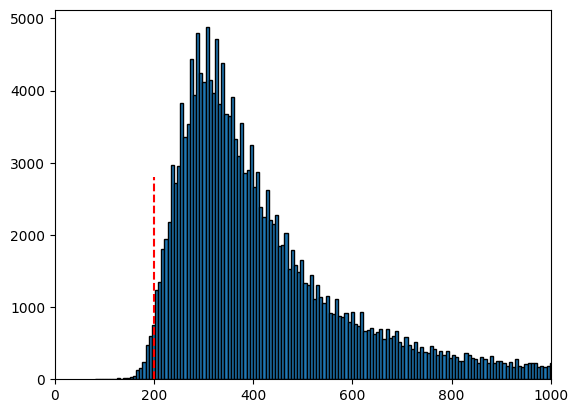

In [28]:
import matplotlib.pyplot as plt
plt.hist(lengths,edgecolor='black',bins = 10000)
plt.vlines(x = 200, ymin=0,ymax = 2800,ls='--',color = 'r')
plt.xlim(0,1000)

(array([2.02292e+05, 3.82800e+03, 1.75600e+03, 1.39200e+03, 1.16000e+03,
        8.32000e+02, 4.82000e+02, 2.40000e+02, 1.30000e+02, 5.60000e+01]),
 array([   81. ,  6447.3, 12813.6, 19179.9, 25546.2, 31912.5, 38278.8,
        44645.1, 51011.4, 57377.7, 63744. ]),
 <BarContainer object of 10 artists>)

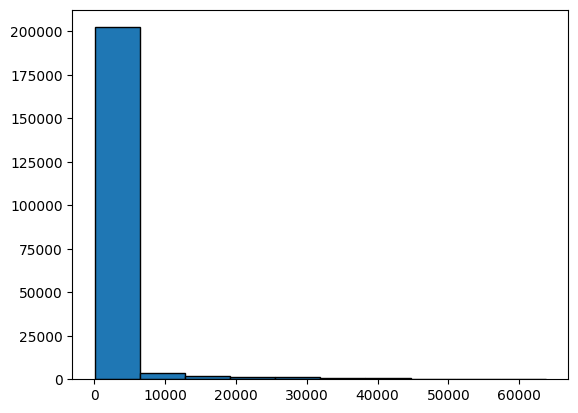

In [41]:
plt.hist(lengths,edgecolor='black')

In [42]:
max(lengths)

63744

In [7]:
from Bio import SeqIO
scores = []
seqs = []
# Open the FASTQ file and parse it
with open('SRR27959541.fastq', 'r') as file:
    # Parse the file record by record
    for record in SeqIO.parse(file, 'fastq'):
        # Process each record as needed
        #rint(record.id)  # Example: Print record ID
        #print(record.seq)  # Example: Print sequence
        seqs.append(record.seq)
        scores.append(record.letter_annotations["phred_quality"])  # Example: Print quality scores

In [12]:
seqs = [str(s) for s in seqs]
len(seqs)

106084

In [3]:
scores = [score for sublist in scores for score in sublist]

(array([ 26.,  77.,  49.,  65.,  48.,  82., 112., 242., 149.,  94.]),
 array([ 2. ,  6.8, 11.6, 16.4, 21.2, 26. , 30.8, 35.6, 40.4, 45.2, 50. ]),
 <BarContainer object of 10 artists>)

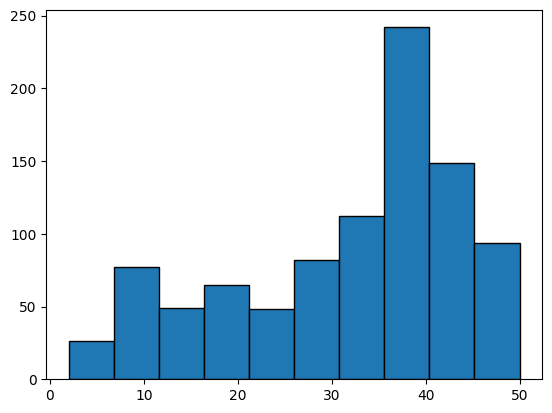

In [12]:
plt.hist(scores[4],edgecolor='black')

In [16]:
with open('filtered_reads.fastq', 'r') as file:
    # Read the file line by line
    reads = []
    lengths = []
    for i,line in enumerate(file):
        # Process each line as needed
        if 'length' in line:
            lengths.append((line.strip().split('=')[-1]))
        reads.append(line.strip())

In [19]:
len(reads)/4

100781.0

In [20]:
lengths = [int(x) for x in lengths]
import numpy as np
np.mean(lengths)

1558.2439844812018

(0.0, 1000.0)

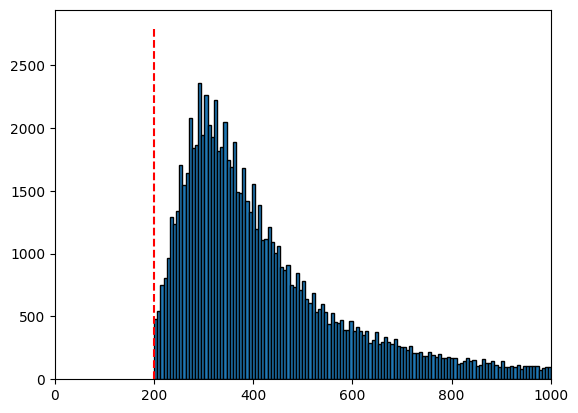

In [25]:
plt.hist(lengths,edgecolor='black',bins = 10000)
plt.vlines(x = 200, ymin=0,ymax = 2800,ls='--',color = 'r')
plt.xlim(0,1000)